# Classify Kinds of Irises


At first, I will take the nearest neighbor algorithm to handle the classification.


In this work, I am going to use only 2 feature values, not 4 to visualize the results easily and to display 2-dimention scatter diagrams, and use only 2 kinds of irises to simplify the classification of them.


## [Task 1] Select the 2 feature values and 2 kinds of irises

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [11]:
# download the iris dataset

iris = load_iris()

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

I decided to choose these following combinations.


- "versicolor" and "virginica"


- "sepal_length" and "petal_length"

In [42]:
# create a dataframe of the combinations

# get the 2 columns, "sepal_length" and "petal_length" as a dataframe
X = pd.DataFrame(iris.data, columns=["sepal_length","sepal_width","petal_length","petal_width"])
X = X.iloc[:,[0,2]]

# let the "target" array a dataframe
y = pd.DataFrame(iris.target, columns=["Species"])

# concatenate those 2 dataframes
df = pd.concat([X,y], axis=1)

# get only raws whose sample is versicolor's or virginica's
df = df[df.Species!=0]

df

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
55,5.7,4.5,1
56,6.3,4.7,1
57,4.9,3.3,1
58,6.6,4.6,1
59,5.2,3.9,1


## [Task 2] Data Analysis

/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


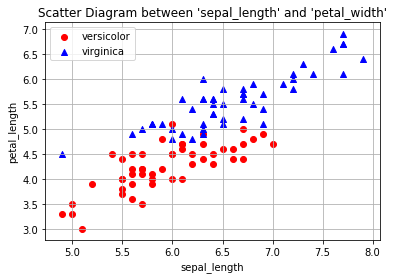

In [57]:
# draw a scatter diagram of the dataframe gotten finally

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(df.sepal_length[df.Species==1],df.petal_length[df.Species==1],c="r",marker="o",label="versicolor")
ax.scatter(df.sepal_length[df.Species==2],df.petal_length[df.Species==2],c="b",marker="^",label="virginica")

ax.set_title("Scatter Diagram between 'sepal_length' and 'petal_width'")
ax.set_xlabel("sepal_length")
ax.set_ylabel("petal_length")

ax.grid(True)
ax.legend(loc="upper left")

fig.show()

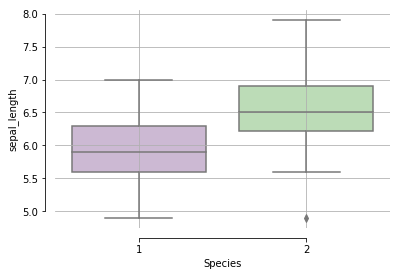

In [53]:
# draw 2 boxplots

sns.boxplot(x="Species",y="sepal_length",data=df,palette="PRGn")

sns.despine(offset=10, trim=True)
plt.grid(True)
plt.show()

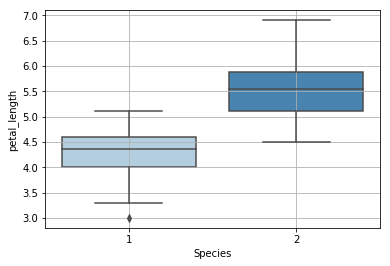

In [54]:
sns.boxplot(x="Species",y="petal_length",data=df,palette="Blues")

plt.grid(True)
plt.show()

/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


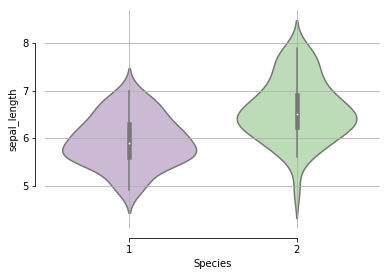

In [55]:
# draw 2 violinplots

sns.violinplot(x="Species",y="sepal_length",data=df,palette="PRGn")

sns.despine(offset=10, trim=True)
plt.grid(True)
plt.show()

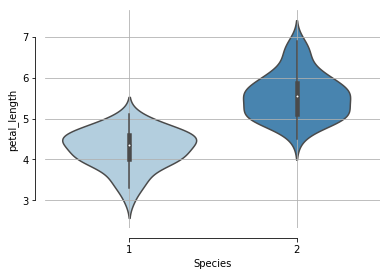

In [56]:
sns.violinplot(x="Species",y="petal_length",data=df,palette="Blues")

sns.despine(offset=10, trim=True)
plt.grid(True)
plt.show()

## [Task 3]
## Preprocessing - Split the Datasets into Train and Validation datasets

In [72]:
# split the dataset into a train dataset and a validation dataset

X = df.iloc[:,[0,1]].values
y = df.Species.values

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.75, random_state=1)

/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## [Task 4] Preprocessing and Standardizing

In [77]:
# init
scaler = StandardScaler()

# fit
scaler.fit(X_train, y_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [76]:
# transform
scaler.transform(X_train,y_train)

/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:745: DeprecationWarning: The parameter y on transform() is deprecated since 0.19 and will be removed in 0.21
  DeprecationWarning)


array([[-0.43975642, -0.47061751],
       [ 0.64926302,  0.97004834],
       [ 0.64926302,  0.12965993],
       [-0.90647904, -0.83078398],
       [-1.06205325, -0.95083947],
       [ 2.20500509,  2.17060322],
       [-0.59533063,  0.24971542],
       [ 0.33811461,  1.09010383],
       [ 0.64926302,  0.3697709 ],
       [-0.43975642, -0.11045105],
       [-1.21762746, -0.590673  ],
       [-1.83992429, -2.27144983],
       [ 1.42713406,  1.4502703 ],
       [-0.28418222, -0.23050654],
       [-1.37320167, -0.47061751],
       [ 0.0269662 ,  0.84999286],
       [ 0.0269662 ,  0.84999286],
       [-0.28418222,  0.00960444],
       [ 0.64926302, -0.590673  ],
       [ 0.0269662 ,  0.24971542],
       [-0.28418222, -0.35056203],
       [-0.90647904, -0.83078398],
       [ 0.96041144,  0.24971542],
       [ 0.80483723, -0.11045105],
       [-0.12860801,  0.60988188],
       [-1.99549849, -1.91128337],
       [ 2.04943088,  2.05054774],
       [ 0.1825404 , -0.71072849],
       [ 0.33811461,

In [75]:
scaler.transform(X_val,y_val)

/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:745: DeprecationWarning: The parameter y on transform() is deprecated since 0.19 and will be removed in 0.21
  DeprecationWarning)


array([[ 1.73828247,  1.4502703 ],
       [-0.28418222,  0.84999286],
       [-0.43975642,  0.24971542],
       [ 2.5161535 ,  1.81043676],
       [ 0.80483723,  1.21015932],
       [-0.75090484, -0.95083947],
       [ 0.64926302, -0.23050654],
       [ 0.1825404 ,  0.84999286],
       [-0.43975642,  0.12965993],
       [ 0.1825404 ,  0.48982639],
       [-0.75090484,  0.24971542],
       [-1.21762746, -1.07089495],
       [-2.1510727 , -0.47061751],
       [ 1.27155985,  1.21015932],
       [-0.75090484,  0.24971542],
       [-0.75090484, -1.19095044],
       [-1.21762746, -1.43106142],
       [-1.06205325, -0.83078398],
       [ 0.1825404 ,  0.84999286],
       [-1.99549849, -1.67117239],
       [ 0.96041144,  0.00960444],
       [ 0.0269662 ,  0.00960444],
       [ 0.33811461,  0.3697709 ],
       [ 0.80483723,  0.72993737],
       [-1.06205325, -1.19095044]])

## [Task 5] Fitting and Prediction


I am going to fit and predict the data by k-nearest neighbors.


### 5-nn

In [102]:
# init
neigh5 = KNeighborsClassifier()

# fit
neigh5.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [127]:
# predict
neigh5_y_val_pred = neigh5.predict(X_val)

neigh5_y_val_pred

array([2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2,
       2, 2, 1])

### 1-nn

In [104]:
# init
neigh1 = KNeighborsClassifier(n_neighbors=1)

# fit
neigh1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [128]:
# predict
neigh1_y_val_pred = neigh1.predict(X_val)

neigh1_y_val_pred

array([2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 1])

### 3-nn

In [106]:
# init
neigh3 = KNeighborsClassifier(3)

# fit
neigh3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [129]:
# predict
neigh3_y_val_pred = neigh3.predict(X_val)

neigh3_y_val_pred

array([2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2,
       2, 2, 1])

## [Task 6] Evaluation


I am going to evaluate the models computing and fitting the accuracy between predicted values and correct values.


### accuracy


    - 

In [130]:
accuracy_score(y_val,neigh5_y_val_pred)

0.92

In [131]:
accuracy_score(y_val,neigh1_y_val_pred)

0.88

In [132]:
accuracy_score(y_val,neigh3_y_val_pred)

0.92

### precision


    - 

In [133]:
precision_score(y_val,neigh5_y_val_pred)

0.9

In [137]:
precision_score(y_val,neigh1_y_val_pred)

0.8181818181818182

In [138]:
precision_score(y_val,neigh3_y_val_pred)

0.9

### recall


    - 

In [139]:
recall_score(y_val,neigh5_y_val_pred)

0.9

In [140]:
recall_score(y_val,neigh1_y_val_pred)

0.9

In [141]:
recall_score(y_val,neigh3_y_val_pred)

0.9

### f1


    - 

In [142]:
f1_score(y_val,neigh5_y_val_pred)

0.9

In [143]:
f1_score(y_val,neigh1_y_val_pred)

0.8571428571428572

In [144]:
f1_score(y_val,neigh3_y_val_pred)

0.9

### confusion_matrix

In [145]:
confusion_matrix(y_val,neigh5_y_val_pred)

array([[ 9,  1],
       [ 1, 14]])

In [147]:
confusion_matrix(y_val,neigh1_y_val_pred)

array([[ 9,  1],
       [ 2, 13]])

In [148]:
confusion_matrix(y_val,neigh3_y_val_pred)

array([[ 9,  1],
       [ 1, 14]])

In [188]:
# create a def of the 5 index values to run at the same time

def evaluate(y_val,y_val_pred):
    print("accuracy score: {}".format(accuracy_score(y_val,y_val_pred)))
    print("precision score: {}".format(precision_score(y_val,y_val_pred)))
    print("recall score: {}".format(recall_score(y_val,y_val_pred)))
    print("f1 score: {}".format(f1_score(y_val,y_val_pred)))
    print("confusion matrix:")
    print(confusion_matrix(y_val,y_val_pred))

In [186]:
# check the def by "neigh5"

evaluate(y_val,neigh5_y_val_pred)

accuracy score: 0.92
precision score: 0.9
recall score: 0.9
f1 score: 0.9
confusion matrix:
[[ 9  1]
 [ 1 14]]


## [Task 7] Visualization

In [153]:
# create a def for decision region

def decision_region(X_train, y_train, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', 
                    target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は学習用データである。

    Parameters
    ----------------
    X_train : ndarray, shape(n_samples, 2)
        学習用データの特徴量
    y_train : ndarray, shape(n_samples,)
        学習用データの正解値
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), 
                                    np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    
    for i, target in enumerate(set(y_train)):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], 
                    marker='o')
    
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

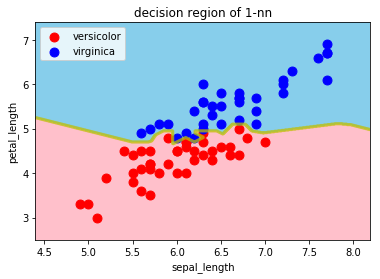

In [169]:
# visualize
decision_region(X_train,y_train,neigh1,title="decision region of 1-nn",xlabel="sepal_length",ylabel="petal_length")

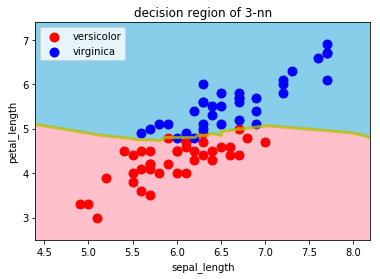

In [155]:
decision_region(X_train,y_train,neigh3,title="decision region of 3-nn",xlabel="sepal_length",ylabel="petal_length")

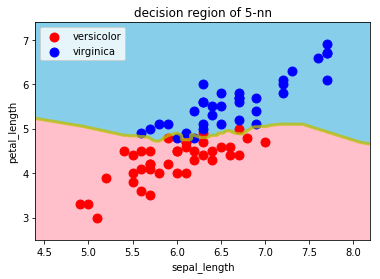

In [156]:
decision_region(X_train,y_train,neigh5,title="decision region of 5-nn",xlabel="sepal_length",ylabel="petal_length")

## [Task 8] Other Classifiers


I am going to fit, predict, evaluate and visualize the datasets by other 4 classifiers. Then, I will draw a table of their index values.


### Logistic Regression

In [164]:
# init
lr_clf = LogisticRegression(random_state=0,solver="lbfgs",multi_class="multinomial")

# fit
lr_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [160]:
# predict
lr_clf_y_val_pred = lr_clf.predict(X_val)

lr_clf_y_val_pred

array([2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 1])

In [161]:
# evaluate
evaluate(y_val,lr_clf_y_val_pred)

accuracy score: 0.88
precision score: 0.8181818181818182
recall score: 0.9
f1 score: 0.8571428571428572
confusion matrix:
[[ 9  1]
 [ 2 13]]


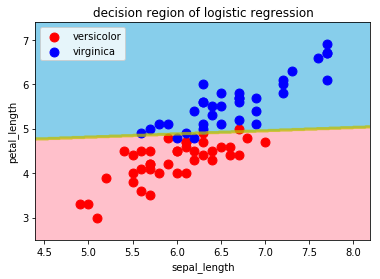

In [170]:
# visualize
decision_region(X_train,y_train,lr_clf,title="decision region of logistic regression",xlabel="sepal_length",ylabel="petal_length")

### SVM

In [165]:
# init
svc_clf = SVC(gamma='auto')

# fit
svc_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [166]:
# predict
svc_clf_y_val_pred = svc_clf.predict(X_val)

svc_clf_y_val_pred

array([2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2,
       2, 2, 1])

In [167]:
# evaluate
evaluate(y_val,svc_clf_y_val_pred)

accuracy score: 0.92
precision score: 0.9
recall score: 0.9
f1 score: 0.9
confusion matrix:
[[ 9  1]
 [ 1 14]]


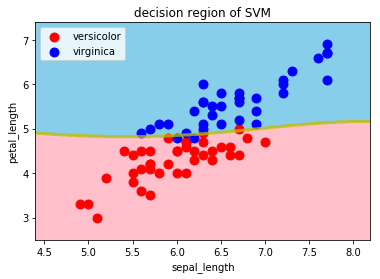

In [171]:
# visualize
decision_region(X_train,y_train,svc_clf,title="decision region of SVM",xlabel="sepal_length",ylabel="petal_length")

### Decision Tree

In [173]:
# init
dt_clf = DecisionTreeClassifier(random_state=0)

# fit
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [174]:
# predict
dt_clf_y_val_pred = dt_clf.predict(X_val)

dt_clf_y_val_pred

array([2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 1])

In [175]:
# evaluate
evaluate(y_val,dt_clf_y_val_pred)

accuracy score: 0.88
precision score: 0.8181818181818182
recall score: 0.9
f1 score: 0.8571428571428572
confusion matrix:
[[ 9  1]
 [ 2 13]]


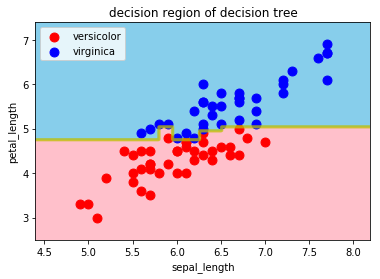

In [176]:
# visualize
decision_region(X_train,y_train,dt_clf,title="decision region of decision tree",xlabel="sepal_length",ylabel="petal_length")

### Random Forest

In [179]:
# init
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)

# fit
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [181]:
# predict
rf_clf_y_val_pred = rf_clf.predict(X_val)

rf_clf_y_val_pred

array([2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 1])

In [183]:
# evaluate
evaluate(y_val,rf_clf_y_val_pred)

accuracy score: 0.88
precision score: 0.8888888888888888
recall score: 0.8
f1 score: 0.8421052631578948
confusion matrix:
[[ 8  2]
 [ 1 14]]


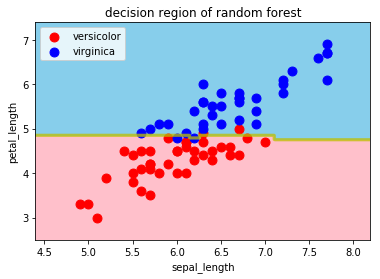

In [184]:
# visualize
decision_region(X_train,y_train,rf_clf,title="decision region of random forest",xlabel="sepal_length",ylabel="petal_length")

In [189]:
# create a table of index values

index_values_table = pd.DataFrame({
    "knearest_neighbors": knearest_neighbiors,
    "logistic_regression": regression_analysis,
    "SVM": SVM,
    "decision_tree": decision_tree,
    "random_forest": random_forest},
    index=["accuracy_score","precision_score","recall_score","f1_score","confusion_matrix"]
)

index_values_table

NameError: name 'knearest_neighbiors' is not defined